In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

In [35]:
np.random.seed(123)

In [36]:
TimeRange = pd.date_range("1/1/2020", periods = 100, freq="H")

In [37]:
TimeSeries = pd.Series(np.random.randn(len(TimeRange)), index=TimeRange)

In [38]:
TimeSeries

2020-01-01 00:00:00   -1.085631
2020-01-01 01:00:00    0.997345
2020-01-01 02:00:00    0.282978
2020-01-01 03:00:00   -1.506295
2020-01-01 04:00:00   -0.578600
                         ...   
2020-01-04 23:00:00    1.031114
2020-01-05 00:00:00   -1.084568
2020-01-05 01:00:00   -1.363472
2020-01-05 02:00:00    0.379401
2020-01-05 03:00:00   -0.379176
Freq: H, Length: 100, dtype: float64

In [39]:
TimeSeries.to_frame()

,0
2020-01-01 00:00:00,-1.085631
2020-01-01 01:00:00,0.997345
2020-01-01 02:00:00,0.282978
2020-01-01 03:00:00,-1.506295
2020-01-01 04:00:00,-0.578600
...,...
2020-01-04 23:00:00,1.031114
2020-01-05 00:00:00,-1.084568
2020-01-05 01:00:00,-1.363472
2020-01-05 02:00:00,0.379401


<AxesSubplot:title={'center':'Time Plot'}>

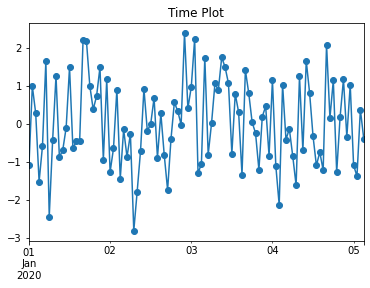

In [40]:
TimeSeries.plot(style='-o', title='Time Plot')

(array([ 2.,  2.,  9., 17., 16., 14., 11., 16.,  8.,  5.]),
 array([-2.79858911, -2.27949367, -1.76039823, -1.24130279, -0.72220736,
        -0.20311192,  0.31598352,  0.83507895,  1.35417439,  1.87326983,
         2.39236527]),
 <BarContainer object of 10 artists>)

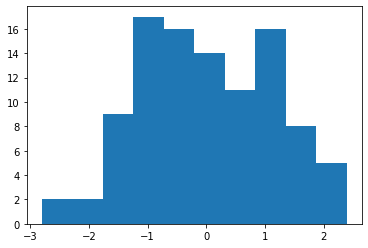

In [41]:
plt.hist(TimeSeries)

In [42]:
TimeSeries.to_frame().describe()

,0
count,100.000000
mean,0.027109
std,1.133924
min,-2.798589
25%,-0.832745
50%,-0.053270
75%,0.983388
max,2.392365


In [43]:
TimeFrame = TimeSeries.to_frame(name="Value")

In [44]:
TimeFrame

,Value
2020-01-01 00:00:00,-1.085631
2020-01-01 01:00:00,0.997345
2020-01-01 02:00:00,0.282978
2020-01-01 03:00:00,-1.506295
2020-01-01 04:00:00,-0.578600
...,...
2020-01-04 23:00:00,1.031114
2020-01-05 00:00:00,-1.084568
2020-01-05 01:00:00,-1.363472
2020-01-05 02:00:00,0.379401


In [45]:
SeasonalFrame = TimeFrame.pivot_table(values="Value", aggfunc="sum", index=TimeFrame.index.hour, columns=TimeFrame.index.day)

In [46]:
SeasonalFrame

,1,2,3,4,5
0,-1.085631,-1.253881,0.978736,1.162204,-1.084568
1,0.997345,-0.637752,2.238143,-1.097203,-1.363472
2,0.282978,0.907105,-1.294085,-2.123100,0.379401
3,-1.506295,-1.428681,-1.038788,1.039727,-0.379176
4,-0.578600,-0.140069,1.743712,-0.403366,NaN
5,1.651437,-0.861755,-0.798063,-0.126030,NaN
6,-2.426679,-0.255619,0.029683,-0.837517,NaN
7,-0.428913,-2.798589,1.069316,-1.605963,NaN
8,1.265936,-1.771533,0.890706,1.255237,NaN
9,-0.866740,-0.699877,1.754886,-0.688869,NaN


In [48]:
groupby_example = TimeFrame.reset_index()

In [49]:
groupby_example['day'] = groupby_example['index'].apply(lambda x: x.day)
groupby_example['hour'] = groupby_example['index'].apply(lambda x: x.hour)

In [32]:
# same pivot table using group by
groupby_example.groupby(['day','hour'])['Value'].sum().unstack('day')

day,1,2,3,4,5
hour,,,,,
0,-1.085631,-1.253881,0.978736,1.162204,-1.084568
1,0.997345,-0.637752,2.238143,-1.097203,-1.363472
2,0.282978,0.907105,-1.294085,-2.123100,0.379401
3,-1.506295,-1.428681,-1.038788,1.039727,-0.379176
4,-0.578600,-0.140069,1.743712,-0.403366,NaN
5,1.651437,-0.861755,-0.798063,-0.126030,NaN
6,-2.426679,-0.255619,0.029683,-0.837517,NaN
7,-0.428913,-2.798589,1.069316,-1.605963,NaN
8,1.265936,-1.771533,0.890706,1.255237,NaN


In [55]:
# fix this
crosstab_example = pd.crosstab(TimeFrame.index.hour, TimeFrame.index.day, values=TimeFrame.Value, aggfunc="sum")

In [56]:
crosstab_example

col_0,1,2,3,4,5
row_0,,,,,
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,NaN
5,0.0,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,0.0,NaN


<AxesSubplot:title={'center':'SeasonalPlot'}>

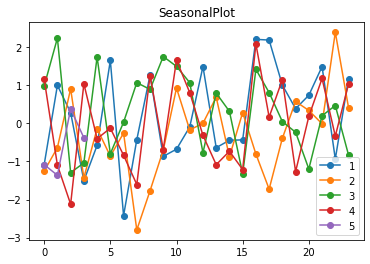

In [57]:
SeasonalFrame.plot(style='o-', title='SeasonalPlot')

In [59]:
TimeFrame['Lag1'] = TimeFrame['Value'].shift(1)

In [61]:
TimeFrame['Lag2'] = TimeFrame['Value'].shift(2)

In [62]:
TimeFrame

,Value,Lag1,Lag2
2020-01-01 00:00:00,-1.085631,NaN,NaN
2020-01-01 01:00:00,0.997345,-1.085631,NaN
2020-01-01 02:00:00,0.282978,0.997345,-1.085631
2020-01-01 03:00:00,-1.506295,0.282978,0.997345
2020-01-01 04:00:00,-0.578600,-1.506295,0.282978
...,...,...,...
2020-01-04 23:00:00,1.031114,-0.335011,1.177862
2020-01-05 00:00:00,-1.084568,1.031114,-0.335011
2020-01-05 01:00:00,-1.363472,-1.084568,1.031114
2020-01-05 02:00:00,0.379401,-1.363472,-1.084568


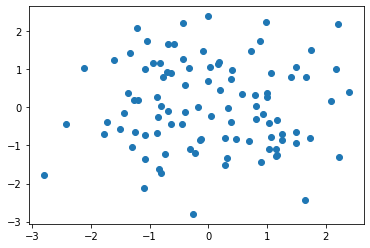

In [66]:
plt.scatter(TimeFrame['Lag1'],TimeFrame['Value'])

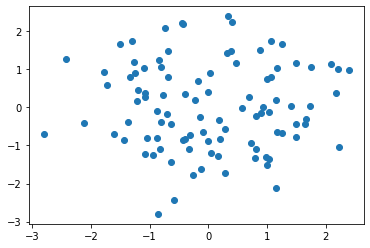

In [67]:
plt.scatter(TimeFrame['Lag2'],TimeFrame['Value'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

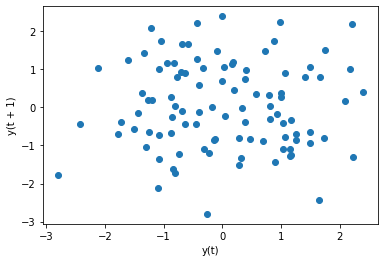

In [65]:
pd.plotting.lag_plot(series=TimeSeries, lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

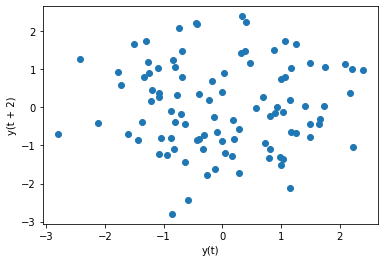

In [68]:
pd.plotting.lag_plot(series=TimeSeries, lag=2)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

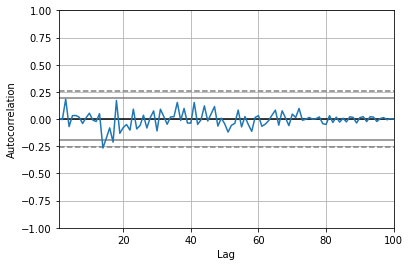

In [69]:
pd.plotting.autocorrelation_plot(TimeSeries)

In [70]:
TimeFrame.corr()

,Value,Lag1,Lag2
Value,1.000000,0.007062,-0.004811
Lag1,0.007062,1.000000,0.008232
Lag2,-0.004811,0.008232,1.000000


In [ ]:
pip install yfinance

In [ ]:
pip install pandas-datareader

In [74]:
import yfinance as yf
from pandas_datareader import data as pdr

In [75]:
start = datetime(2015, 1, 1)
end = datetime(2022, 11, 8)

In [76]:
yf.pdr_override()

In [77]:
twitter = yf.download("TWTR", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [78]:
twitter

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,36.230000,36.740002,35.540100,36.560001,36.560001,12062461
2015-01-05,36.259998,37.110001,35.639999,36.380001,36.380001,15062744
2015-01-06,36.270000,39.450001,36.040001,38.759998,38.759998,33050812
2015-01-07,39.099998,39.099998,37.060001,37.279999,37.279999,22675663
2015-01-08,37.419998,39.189999,37.090000,39.090000,39.090000,19190436
...,...,...,...,...,...,...
2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029
2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553
2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848


In [79]:
twitter_adjclose = twitter["Adj Close"]

<AxesSubplot:xlabel='Date'>

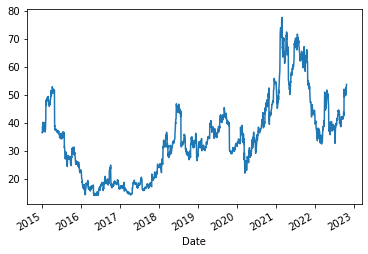

In [136]:
twitter_adjclose.plot()

(array([455., 140., 364., 396., 241., 155.,  63.,  69.,  73.,  14.]),
 array([14.01000023, 20.37199993, 26.73399963, 33.09599934, 39.45799904,
        45.81999874, 52.18199844, 58.54399815, 64.90599785, 71.26799755,
        77.62999725]),
 <BarContainer object of 10 artists>)

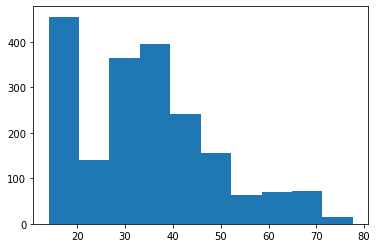

In [81]:
plt.hist(twitter_adjclose)

In [137]:
twitter_df = twitter_adjclose.to_frame(name="price")

In [138]:
twitter_df

,price
Date,
2015-01-02,36.560001
2015-01-05,36.380001
2015-01-06,38.759998
2015-01-07,37.279999
2015-01-08,39.090000
...,...
2022-10-21,49.889999
2022-10-24,51.520000
2022-10-25,52.779999


In [148]:
seasonal_df = twitter_df.pivot_table(values="price", aggfunc="mean", index=twitter_df.index.month, columns=twitter_df.index.year)

In [149]:
seasonal_df

Date,2015,2016,2017,2018,2019,2020,2021,2022
Date,,,,,,,,
1,38.281000,18.675789,16.980000,24.211429,31.923810,33.091428,49.231579,37.825500
2,46.401579,16.823000,16.732105,30.693158,31.583158,36.024210,66.228946,35.736316
3,48.055454,17.159091,15.173913,33.168095,31.567619,28.467273,66.716956,36.081739
4,49.803809,16.757143,14.793158,29.604286,35.845238,27.041429,67.256666,47.660000
5,37.195000,14.390000,18.413182,32.640909,38.065909,30.070500,54.161500,42.502381
6,35.696363,15.698636,17.596364,43.154762,36.061000,33.185454,62.119091,38.766190
7,35.051364,17.739000,18.814000,42.441428,38.120455,35.419546,68.959524,38.285000
8,27.632381,18.690435,16.345652,33.386521,41.633182,38.547143,65.086363,42.124783
9,27.077619,19.983810,17.383500,30.058421,43.016000,41.297143,62.985715,41.467143


<AxesSubplot:xlabel='Date'>

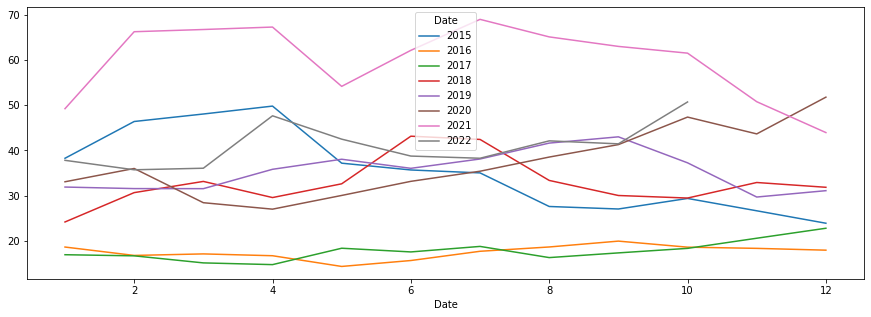

In [150]:
seasonal_df.plot(figsize=(15,5))

In [154]:
twitter_df.resample('Y').last()

,price
Date,
2015-12-31,23.139999
2016-12-31,16.299999
2017-12-31,24.010000
2018-12-31,28.740000
2019-12-31,32.049999
2020-12-31,54.150002
2021-12-31,43.220001
2022-12-31,53.700001


In [156]:
twitter_df.resample('BM').max() #business month

,price
Date,
2015-01-30,40.169998
2015-02-27,49.410000
2015-03-31,51.470001
2015-04-30,52.869999
2015-05-29,37.880001
...,...
2022-06-30,40.439999
2022-07-29,41.610001
2022-08-31,44.500000


In [157]:
twitter_df.resample("H").last()

,price
Date,
2015-01-02 00:00:00,36.560001
2015-01-02 01:00:00,NaN
2015-01-02 02:00:00,NaN
2015-01-02 03:00:00,NaN
2015-01-02 04:00:00,NaN
...,...
2022-10-26 20:00:00,NaN
2022-10-26 21:00:00,NaN
2022-10-26 22:00:00,NaN


In [158]:
twitter_df.resample("H").ffill()

,price
Date,
2015-01-02 00:00:00,36.560001
2015-01-02 01:00:00,36.560001
2015-01-02 02:00:00,36.560001
2015-01-02 03:00:00,36.560001
2015-01-02 04:00:00,36.560001
...,...
2022-10-26 20:00:00,53.349998
2022-10-26 21:00:00,53.349998
2022-10-26 22:00:00,53.349998


In [159]:
twitter_df.resample("H").bfill()

,price
Date,
2015-01-02 00:00:00,36.560001
2015-01-02 01:00:00,36.380001
2015-01-02 02:00:00,36.380001
2015-01-02 03:00:00,36.380001
2015-01-02 04:00:00,36.380001
...,...
2022-10-26 20:00:00,53.700001
2022-10-26 21:00:00,53.700001
2022-10-26 22:00:00,53.700001


In [162]:
twitter_hourly_estimate = twitter_df.resample("H").interpolate()

<AxesSubplot:xlabel='Date'>

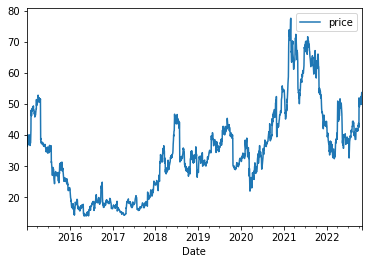

In [163]:
twitter_hourly_estimate.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

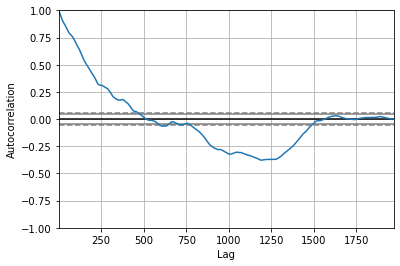

In [164]:
pd.plotting.autocorrelation_plot(twitter_adjclose)